In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Grab finished Dataframe, drop columns for season and season week (this will be looking at whole time period)
death_df = pd.read_csv("../Data/final_death_data.csv").drop(["season", "season_week"], axis=1)
death_df

,jurisdiction,week_end_date,all_cause,septicemia,cancer,diabetes,Alzheimers,influenza_pneumonia,chronic_LRD,other_respiratory,kidney,NEC,heart_disease,CBVD,COVID19_UCOD
0,United States,10/11/2014,47936.706552,672.086975,11269.826525,1341.081525,1750.312397,799.907197,2467.754935,627.762220,863.817308,643.224344,11135.821454,2394.567549,0.0
1,United States,10/18/2014,47948.045442,712.288496,11135.821454,1298.818387,1820.407358,855.570842,2490.432716,644.255152,801.968813,629.823837,11375.999774,2527.541813,0.0
2,United States,10/25/2014,47709.928738,648.378385,11158.499235,1312.218894,1862.670496,835.985485,2531.665046,661.778892,821.554170,619.515754,11130.667412,2550.219594,0.0
3,United States,11/1/2014,47638.802969,709.196071,11166.745701,1266.863331,1879.163428,855.570842,2537.849895,617.454138,837.016294,596.837973,10964.707285,2510.018073,0.0
4,United States,11/8/2014,49680.834100,697.857181,11222.409346,1376.129005,1979.151827,815.369321,2709.994872,676.210208,823.615786,718.473346,11670.810932,2660.516076,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,United States,8/29/2020,57553.000000,699.000000,10957.000000,1727.000000,2271.000000,629.000000,2428.000000,712.000000,925.000000,976.000000,11755.000000,2807.000000,4913.0
308,United States,9/5/2020,56507.000000,656.000000,10721.000000,1661.000000,2332.000000,681.000000,2408.000000,761.000000,865.000000,1007.000000,11728.000000,2674.000000,4174.0
309,United States,9/12/2020,56005.000000,640.000000,10783.000000,1741.000000,2186.000000,654.000000,2412.000000,707.000000,873.000000,1113.000000,11584.000000,2882.000000,3804.0
310,United States,9/19/2020,55923.000000,705.000000,10944.000000,1691.000000,2225.000000,665.000000,2369.000000,756.000000,851.000000,1111.000000,11893.000000,2777.000000,3461.0


In [2]:
# Array holding causes of death is crafted
causes_array = death_df.columns[2:]
causes_array

Index(['all_cause', 'septicemia', 'cancer', 'diabetes', 'Alzheimers',
       'influenza_pneumonia', 'chronic_LRD', 'other_respiratory', 'kidney',
       'NEC', 'heart_disease', 'CBVD', 'COVID19_UCOD'],
      dtype='object')

In [3]:
# Array of Titles is crafted with indexing identical to array of causes of death 
title_array = ["All-Causes", "Septicemia", "Cancer", "Diabetes", "Alzheimer Disease", "Influenza-Pneumonia",\
              "Chronic Lower Respiratory Disease", "Other Respiratory Illness", "Kidney Disease", "NEC",\
              "Heart Disease", "Cerebrovascular Disease", "Covid 19"]
title_array

['All-Causes',
 'Septicemia',
 'Cancer',
 'Diabetes',
 'Alzheimer Disease',
 'Influenza-Pneumonia',
 'Chronic Lower Respiratory Disease',
 'Other Respiratory Illness',
 'Kidney Disease',
 'NEC',
 'Heart Disease',
 'Cerebrovascular Disease',
 'Covid 19']

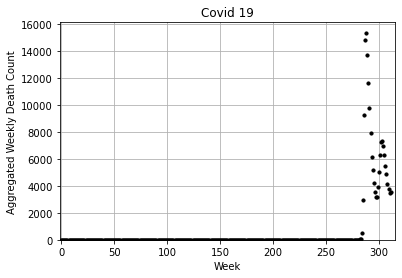

In [4]:
# Create scatterplots for all causes of death

# For loop to generate visualizations for all causes of death
for i in range(len(causes_array)):
    
    # Cause of death and relevant title grabbed
    cause = causes_array[i]
    title = title_array[i]
    
    # Clear plot from last run
    plt.clf()
    
    # points are created
    x = death_df.index
    y = death_df[cause]
    
    # Points are plotted, and labels made
    plt.scatter(x, y, facecolor="black", s=10, zorder=2)
    plt.title(title)
    plt.xlabel(f'Week')
    plt.ylabel("Aggregated Weekly Death Count")
    plt.grid(True, zorder=1)
    plt.ylim([0, max(death_df[cause])*1.05])
    plt.xlim([-1,315])
    
    # plot is saved as a png with identifying title
    plt.savefig(f'../Visualizations/aggregated__cause_of_death_{cause}.png',format='png')